# Clustering the protein dataset

The goal is to cluster the data with several different methods, in order to find the annotations that match the clusters thee best. 

## Creating the datasets

### Protein datasets

In [1]:
from subpred.dataset import create_dataset, SUBSTRATE_KEYWORDS

df_uniprot = create_dataset(
    input_file="../data/raw/uniprot/uniprot_2022_05_evidence1-2_nofragments.tsv",
    # keywords_classes = None,
    # keywords_classes_all = SUBSTRATE_KEYWORDS,
    # keywords_filter = None,
    multi_substrate="keep",
    # outliers=outliers,
    verbose=True,
    # tax_ids_filter=[3702, 9606, 83333, 559292],
    # sequence_clustering=70,
    evidence_code=2,
    invalid_amino_acids="remove_amino_acids",
    # gene_names_only = True,
    # force_update=True,
    # remove_sequence_fragments = True,
    # force_update = False,
    tcdb_substrates_file="../data/raw/tcdb/tcdb_substrates.tsv",
    swissprot_only=False,
)
print(df_uniprot.shape)
df_uniprot.head()


Found pickle, reading...
(1021957, 16)


,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id,go_ids,keyword_ids,keywords,tcdb_id,interpro,tcdb_class,tcdb_substrates,keywords_substrates,keywords_transport_related,keywords_location
Uniprot,,,,,,,,,,,,,,,,
A0A0C5B5G6,MT-RNR1,Mitochondrial-derived peptide MOTS-c (Mitochon...,reviewed,Evidence at protein level,MRWQEMGYIFYPRKLR,9606,GO:0001649; GO:0003677; GO:0005615; GO:0005634...,KW-0238; KW-0496; KW-0539; KW-0892; KW-1185; K...,DNA-binding;Mitochondrion;Nucleus;Osteogenesis...,NaN,NaN,0.0,NaN,,,
A0A1B0GTW7,CIROP LMLN2,Ciliated left-right organizer metallopeptidase...,reviewed,Evidence at protein level,MLLLLLLLLLLPPLVLRVAASRCLHDETQKSVSLLRPPFSQLPSKS...,9606,GO:0004222; GO:0005737; GO:0006508; GO:0007155...,KW-0025; KW-0225; KW-0325; KW-1056; KW-0378; K...,Alternative splicing;Disease variant;Glycoprot...,NaN,IPR001577;,0.0,NaN,,,
A0JNW5,BLTP3B KIAA0701 SHIP164 UHRF1BP1L,Bridge-like lipid transfer protein family memb...,reviewed,Evidence at protein level,MAGIIKKQILKHLSRFTKNLSPDKINLSTLKGEGELKNLELDEEVL...,9606,GO:0005769; GO:0005829; GO:0034498; GO:0042803...,KW-0025; KW-0175; KW-0963; KW-0967; KW-0597; K...,Alternative splicing;Coiled coil;Cytoplasm;End...,NaN,IPR026728;IPR026854;,0.0,NaN,,,
A0JP26,POTEB3,POTE ankyrin domain family member B3,reviewed,Evidence at protein level,MVAEVCSMPAASAVKKPFDLRSKMGKWCHHRFPCCRGSGKSNMGTS...,9606,NaN,KW-0025; KW-0040; KW-0175; KW-1185; KW-0677,Alternative splicing;ANK repeat;Coiled coil;Re...,NaN,IPR002110;IPR036770;IPR039497;,0.0,NaN,,,
A0PK11,CLRN2,Clarin-2,reviewed,Evidence at protein level,MPGWFKKAWYGLASLLSFSSFILIIVALVVPHWLSGKILCQTGVDL...,9606,GO:0007605; GO:0032421; GO:0060088; GO:0060171...,KW-1003; KW-0966; KW-0209; KW-0225; KW-0325; K...,Cell membrane;Cell projection;Deafness;Disease...,9.A.46.1.2,IPR026748;,9.A,NaN,,,


In [2]:
df_swissprot = df_uniprot[df_uniprot.reviewed == "reviewed"]
df_swissprot.shape

(146597, 16)

### Annotation datasets

In [3]:
from subpred.dataset import get_go_df, get_keywords_df, get_tcdb_substrates

df_kw_uniprot = get_keywords_df(df_uniprot)
df_kw_uniprot.head()


,Uniprot,keyword
0,A0A0C5B5G6,DNA-binding
1,A0A0C5B5G6,Mitochondrion
2,A0A0C5B5G6,Nucleus
3,A0A0C5B5G6,Osteogenesis
4,A0A0C5B5G6,Reference proteome


In [4]:
df_kw_uniprot_long = df_kw_uniprot.assign(dataset="keyword").rename(
    columns={"keyword": "annotation"}
)[["Uniprot", "dataset", "annotation"]]
df_kw_uniprot_long.head()


,Uniprot,dataset,annotation
0,A0A0C5B5G6,keyword,DNA-binding
1,A0A0C5B5G6,keyword,Mitochondrion
2,A0A0C5B5G6,keyword,Nucleus
3,A0A0C5B5G6,keyword,Osteogenesis
4,A0A0C5B5G6,keyword,Reference proteome


In [5]:
from subpred.go_utils import GeneOntology

go = GeneOntology("../data/raw/ontologies/go.owl")


In [6]:
df_go_uniprot = get_go_df(df_uniprot, go)
df_go_uniprot.head()


,Uniprot,go_id,go_term
0,A0A0C5B5G6,GO:0001649,osteoblast differentiation
1,A0A0C5B5G6,GO:0003677,DNA binding
2,A0A0C5B5G6,GO:0005615,extracellular space
3,A0A0C5B5G6,GO:0005634,nucleus
4,A0A0C5B5G6,GO:0005739,mitochondrion


In [7]:
df_go_uniprot_long = df_go_uniprot.melt(
    id_vars=["Uniprot"],
    value_vars=["go_id", "go_term"],
    var_name="dataset",
    value_name="annotation",
)
# df_go_uniprot_long = df_go_uniprot_long[df_go_uniprot_long.dataset == "go_term"]
df_go_uniprot_long.head()


,Uniprot,dataset,annotation
0,A0A0C5B5G6,go_id,GO:0001649
1,A0A0C5B5G6,go_id,GO:0003677
2,A0A0C5B5G6,go_id,GO:0005615
3,A0A0C5B5G6,go_id,GO:0005634
4,A0A0C5B5G6,go_id,GO:0005739


In [8]:
# TODO TCDB classes
df_tcdb_uniprot = get_tcdb_substrates(df_uniprot)
df_tcdb_uniprot = df_tcdb_uniprot.assign(
    tcdb_class=df_tcdb_uniprot.tcdb_id.apply(lambda x: x[:3])
)
df_tcdb_uniprot.head()


,Uniprot,tcdb_id,chebi_id,chebi_term,tcdb_class
0,A6NI61,1.N.2.1.1,CHEBI:25367,molecule,1.N
1,A6NKB5,9.A.80.1.1,CHEBI:24636,proton,9.A
2,O00168,1.A.27.1.8,CHEBI:22563,anion,1.A
3,O00337,2.A.41.2.3,CHEBI:9175,sodium(1+),2.A
4,O00337,2.A.41.2.3,CHEBI:9893,uridine,2.A


In [9]:
df_tcdb_uniprot_long = df_tcdb_uniprot.melt(
    id_vars=["Uniprot"],
    value_vars=["tcdb_id", "chebi_id", "chebi_term"],
    var_name="dataset",
    value_name="annotation",
)
df_tcdb_uniprot_long.head()


,Uniprot,dataset,annotation
0,A6NI61,tcdb_id,1.N.2.1.1
1,A6NKB5,tcdb_id,9.A.80.1.1
2,O00168,tcdb_id,1.A.27.1.8
3,O00337,tcdb_id,2.A.41.2.3
4,O00337,tcdb_id,2.A.41.2.3


In [10]:
import pandas as pd

df_uniprot_interpro = (
    df_uniprot.interpro.dropna().str.rstrip(";").str.split(";").explode().str.strip()
)
assert df_uniprot_interpro[~df_uniprot_interpro.str.match("IPR[0-9]{6}")].shape[0] == 0
df_uniprot_interpro = df_uniprot_interpro.reset_index(
    drop=False
)  # [df_uniprot_interpro.isnull()]
df_uniprot_interpro


,Uniprot,interpro
0,A0A1B0GTW7,IPR001577
1,A0JNW5,IPR026728
2,A0JNW5,IPR026854
3,A0JP26,IPR002110
4,A0JP26,IPR036770
...,...,...
4190605,X5MFI4,IPR029044
4190606,X5MI49,IPR008630
4190607,X5MI49,IPR029044
4190608,X5MPI5,IPR008630


In [11]:
df_uniprot_interpro_long = df_uniprot_interpro.assign(dataset="interpro").rename(
    columns={"interpro": "annotation"}
)[["Uniprot", "dataset", "annotation"]]
df_uniprot_interpro_long.head()


,Uniprot,dataset,annotation
0,A0A1B0GTW7,interpro,IPR001577
1,A0JNW5,interpro,IPR026728
2,A0JNW5,interpro,IPR026854
3,A0JP26,interpro,IPR002110
4,A0JP26,interpro,IPR036770


In [12]:
df_uniprot_organism_long = (
    df_uniprot.organism_id.reset_index(drop=False)
    .drop_duplicates()
    .assign(dataset="organism_id")
    .rename(columns={"organism_id": "annotation"})[["Uniprot", "dataset", "annotation"]]
)


### Dataframe containing all annotations

In [13]:
df_annotations = pd.concat(
    [
        df_kw_uniprot_long,
        df_go_uniprot_long,
        df_tcdb_uniprot_long,
        df_uniprot_interpro_long,
        df_uniprot_organism_long,
    ],
    ignore_index=True,
)

df_annotations = df_annotations[~df_annotations.duplicated()]

assert df_annotations[df_annotations.Uniprot.isnull()].shape[0] == 0
assert df_annotations[df_annotations.dataset.isnull()].shape[0] == 0
assert df_annotations[df_annotations.annotation.isnull()].shape[0] == 0

df_annotations.head()


,Uniprot,dataset,annotation
0,A0A0C5B5G6,keyword,DNA-binding
1,A0A0C5B5G6,keyword,Mitochondrion
2,A0A0C5B5G6,keyword,Nucleus
3,A0A0C5B5G6,keyword,Osteogenesis
4,A0A0C5B5G6,keyword,Reference proteome


## TODOs

- Should I only keep proteins for which all/most types of annotation are available?
    - Most proteins do not have TCDB id, so that would not be feasible
- Add non-Uniprot GO terms?
    - Fewer terms, but we know the qualifiers and evidence codes
- Encode sequences
    - AAC, PAAC
    - Seqvec
    - Internal encoding of clustering program
- Calculate clusters
    - CD-Hit
    - MMseqs2 (used by PDB) (TODO install in env, export new env)
        - Also provides search functionality, for example for annotating organism. Can this be used to predict things with homology?
    - Sklearn unsupervised learning
- Analysis
    - Enrichment analysis of clusters, sort
        - GSEA etc.
        - Hypergeometric test
    - Rand index
- Only use Protein level evidence proteins?
- PCA
    - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3982804/


## Trying PAAC + sklearn

In [14]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,12)})
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from subpred.compositions import calculate_aac, calculate_paac

In [15]:
transmembrane_transporter_terms = go.get_descendants(go.get_identifier("transmembrane transporter activity"))
transmembrane_transporter_terms

{'GO:0015151',
 'GO:0000227',
 'GO:0015652',
 'GO:0015558',
 'GO:0140892',
 'GO:0015227',
 'GO:0016463',
 'GO:0022821',
 'GO:0015591',
 'GO:0046715',
 'GO:0034228',
 'GO:0005291',
 'GO:0005316',
 'GO:0005353',
 'GO:0015284',
 'GO:0005477',
 'GO:0015615',
 'GO:0044668',
 'GO:0043250',
 'GO:0005412',
 'GO:1901480',
 'GO:0009496',
 'GO:0015311',
 'GO:0015369',
 'GO:0015157',
 'GO:0015207',
 'GO:0015146',
 'GO:0000269',
 'GO:0005328',
 'GO:0015111',
 'GO:0022897',
 'GO:0005310',
 'GO:0015136',
 'GO:0086008',
 'GO:0036080',
 'GO:0005250',
 'GO:0086057',
 'GO:0042907',
 'GO:0015208',
 'GO:0140930',
 'GO:0015607',
 'GO:0015269',
 'GO:0031928',
 'GO:0015341',
 'GO:0015541',
 'GO:0008559',
 'GO:0046583',
 'GO:0070089',
 'GO:0015218',
 'GO:0005330',
 'GO:0140902',
 'GO:0019182',
 'GO:1903425',
 'GO:0015090',
 'GO:0019829',
 'GO:0042933',
 'GO:0022839',
 'GO:0090588',
 'GO:0008381',
 'GO:0015377',
 'GO:0086078',
 'GO:0098697',
 'GO:0022835',
 'GO:0048249',
 'GO:0015298',
 'GO:0034041',
 'GO:00154

In [16]:
transmembrane_transporter_alternative_terms = ["GO:0022857", "GO:0005386", "GO:0015563", "GO:0015646", "GO:0022891", "GO:0022892"]
print([len(go.get_descendants(ident)) for ident in transmembrane_transporter_alternative_terms])
[len(df_annotations[(df_annotations.dataset == "go_id") & df_annotations.annotation == transmembrane_transporter_alternative_term]) for transmembrane_transporter_alternative_term in transmembrane_transporter_alternative_terms]

[1024, 0, 0, 0, 0, 0]


[0, 0, 0, 0, 0, 0]

In [17]:
transmembrane_transporters = set(df_annotations[(df_annotations.dataset == "go_id") & df_annotations.annotation.isin(transmembrane_transporter_terms)].Uniprot.unique())

In [18]:
""" TODO 
- Was sind die GO terms mit den meisten transmembran-Proteinen im Datensatz?
    - Color them in plots!
- GO terms aus anderem File? Momentan sind nur Uniprot im Datensatz
""" 

' TODO \n- Was sind die GO terms mit den meisten transmembran-Proteinen im Datensatz?\n    - Color them in plots!\n- GO terms aus anderem File? Momentan sind nur Uniprot im Datensatz\n'

In [19]:
transmembrane_transporter_descendants = go.get_descendants(go.get_identifier("transmembrane transporter activity"))

df_transmembrane_transporter_descendants = df_annotations[df_annotations.annotation.isin(transmembrane_transporter_descendants)]
df_transmembrane_transporter_descendants = df_transmembrane_transporter_descendants.rename(columns={"annotation": "go_id"}).merge(df_go_uniprot[["go_id", "go_term"]], how="left", on="go_id").drop_duplicates()

df_transmembrane_transporter_descendants

,Uniprot,dataset,go_id,go_term
0,B7U540,go_id,GO:0005242,inward rectifier potassium channel activity
344,O00168,go_id,GO:0005254,chloride channel activity
1239,O00337,go_id,GO:0005337,nucleoside transmembrane transporter activity
1415,O00337,go_id,GO:0005345,purine nucleobase transmembrane transporter ac...
1499,O00337,go_id,GO:0005415,nucleoside:sodium symporter activity
...,...,...,...,...
72024449,X5IHB7,go_id,GO:0008324,cation transmembrane transporter activity
72024921,X5II77,go_id,GO:0008324,cation transmembrane transporter activity
72025393,X5IYJ3,go_id,GO:0008324,cation transmembrane transporter activity
72025865,X5J6M9,go_id,GO:0005262,calcium channel activity


In [20]:
df_transmembrane_transporter_descendants.go_term.value_counts()[:10]

transmembrane transporter activity                           5872
ABC-type transporter activity                                2239
symporter activity                                           1716
proton-transporting ATPase activity, rotational mechanism    1627
maltose transporting porin activity                          1591
maltodextrin transmembrane transporter activity              1591
channel activity                                             1550
cytochrome-c oxidase activity                                1385
voltage-gated potassium channel activity                     1226
NADH dehydrogenase (ubiquinone) activity                     1132
Name: go_term, dtype: int64

In [21]:
sequences_uniprot = df_uniprot.sequence
sequences_transmembrane_transporters = sequences_uniprot[sequences_uniprot.index.isin(transmembrane_transporters)]

In [22]:
sequences = sequences_transmembrane_transporters

In [23]:
df_aac = calculate_aac(sequences)
df_paac = calculate_paac(sequences)

clustering_df = df_aac

<AxesSubplot:>

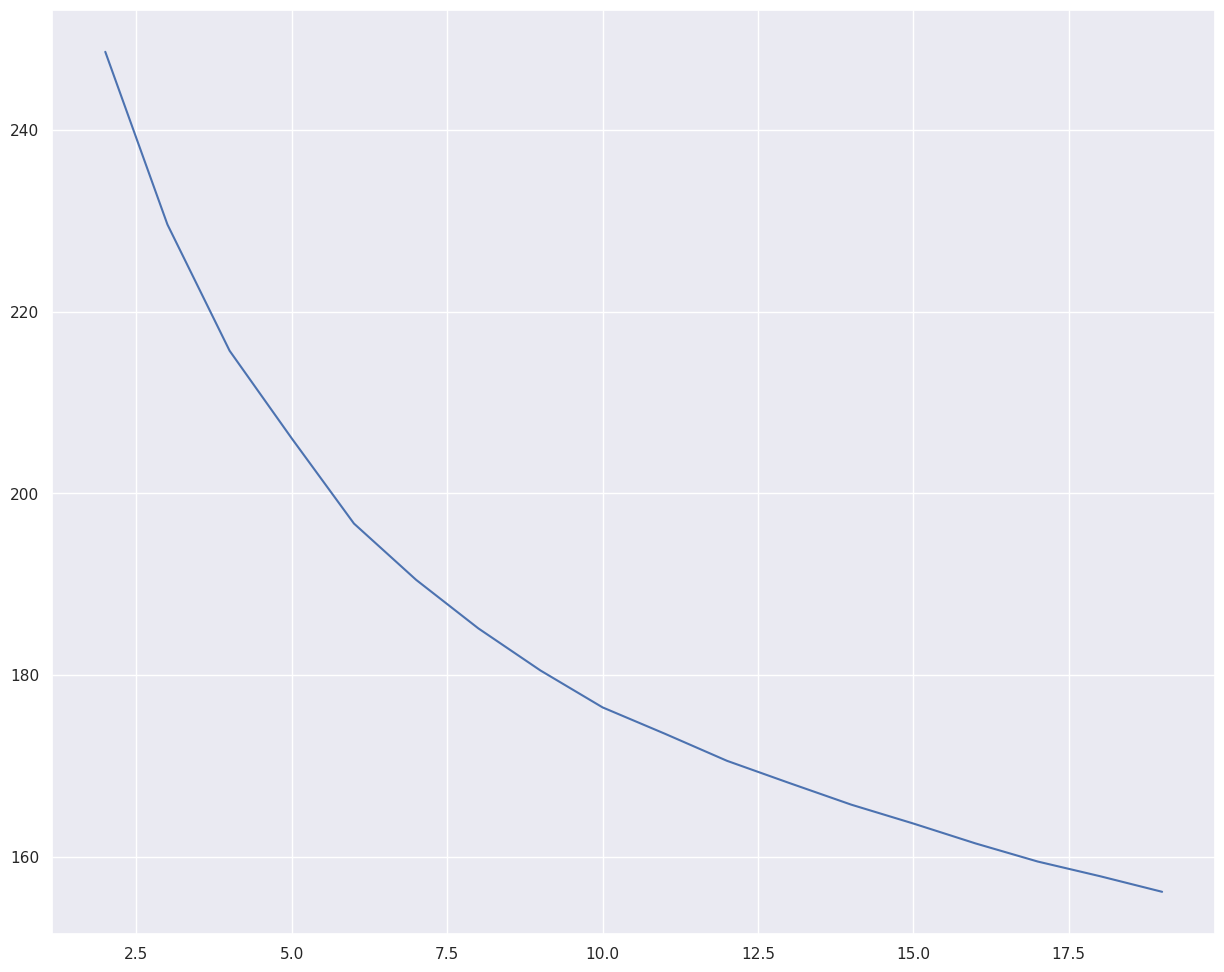

In [24]:
inertias = []
k_values = list(range(2,20))
for k in k_values:
    kmeans_tmp = KMeans(random_state=1, n_clusters = k)
    kmeans_tmp.fit(clustering_df)
    inertias.append(kmeans_tmp.inertia_)

pd.Series(data=inertias, index=k_values).plot()

In [25]:
num_clusters = 8

kmeans = make_pipeline(StandardScaler(),KMeans(n_clusters=num_clusters))

kmeans.fit(clustering_df)
labels_kmeans = kmeans["kmeans"].labels_

In [26]:
clustering_labels = labels_kmeans

In [27]:
pipe = make_pipeline(StandardScaler(), PCA(n_components=2))
df_pca = pd.DataFrame(pipe.fit_transform(clustering_df), columns=["PC1", "PC2"])

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

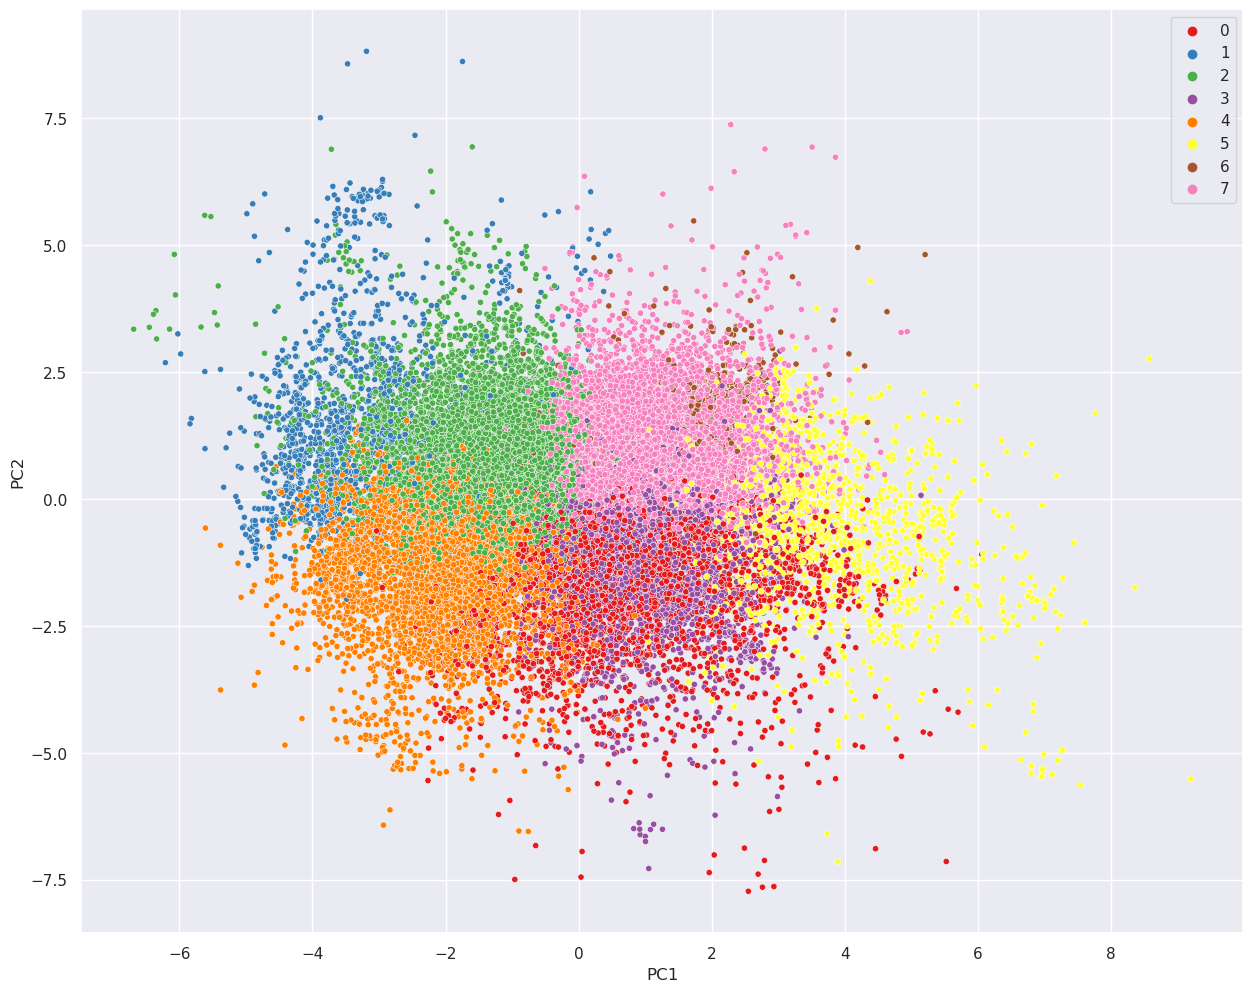

In [28]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
sns.scatterplot(df_pca, x="PC1", y="PC2", hue=clustering_labels, palette="Set1", s=20)

## Trying Sequence clustering CLI programs:
- CD-Hit
- MMseq2
    - Most important parameters: https://github.com/soedinglab/MMseqs2/wiki#clustering-criteria
    - Output format: Long TSV TODO write parser
    - Disadvantage: No pairwise scores, no PCA plots

In [52]:
# Fasta export TODO temp file
from subpred.fasta import write_fasta

fasta_file_name = "/home/ad/tmp.fasta"

# df_uniprot_test = df_uniprot[
#     (df_uniprot.reviewed == "reviewed")
#     & (df_uniprot.protein_existence == "Evidence at protein level")
# ]
df_uniprot_test = df_uniprot[
    (df_uniprot.protein_existence == "Evidence at protein level")
]
df_uniprot_test = df_uniprot_test.sequence.reset_index(drop=False)
df_uniprot_test = df_uniprot_test[~df_uniprot_test.duplicated()]
sequences_test = df_uniprot_test.set_index("Uniprot", drop=True).sequence
# write_fasta(fasta_file_name, fasta_data)


### using cd-hit

In [30]:
type(sequences_test)

pandas.core.series.Series

In [31]:
# from subpred.cdhit import cd_hit

# res = cd_hit(sequences_test, identity_threshold=40, n_threads=40, verbose=False)

KeyboardInterrupt: 

### Using mmseqs2

mmseqs easy-cluster tmp.fasta tmp_out.fasta tmp


--min-seq-id 0.5 -c 0.8 --cov-mode 1


 mmseqs easy-cluster examples/DB.fasta result tmp



In [ ]:
# Cluster output
#  - result_rep_seq.fasta: Representatives
#  - result_all_seq.fasta: FASTA-like per cluster
#  - result_cluster.tsv:   Adjacency list

# Important parameter: --min-seq-id, --cov-mode and -c
#                  --cov-mode
#                  0    1    2
# Q: MAVGTACRPA  60%  IGN  60%
# T: -AVGTAC---  60% 100%  IGN
#        -c 0.7    -    +    -
#        -c 0.6    +    +    +

# Cascaded clustering with reassignment
# - Corrects criteria-violations of cascaded merging
# - Produces more clusters and is a bit slower

In [ ]:
1e-3

0.001

In [53]:
# TODO finish

import tempfile
import subprocess
import os
from subpred.fasta import read_fasta, write_fasta
import pandas as pd


def mmseq(
    sequences: pd.Series,
    fast_algo: bool = False,
    cluster_mode: int = 0,
    min_seq_id: float = 0.0,
    min_coverage: float = 0.8,
    cov_mode: int = 0,
    max_evalue: float = 1e-3,
    verbose: bool = False,
) -> pd.DataFrame:
    """Python wrapper for MMSeqs2

    Args:
        sequences (pd.Series): 
            Series with identifiers as index and amino acid sequences as values
        fast_algo (bool, optional): 
            Use linclust algorithm (for huge datasets). Defaults to False.
        cluster_mode (int, optional):
            0: Set-Cover (greedy)
            1: Connected component (BLASTclust)
            2,3: Greedy clustering by sequence length (CDHIT).
            Defaults to 0.
        min_seq_id (float, optional):
            List matches above this sequence identity (for clustering) (range 0.0-1.0). Defaults to 0.0.
        min_coverage (float, optional):
            -c. List matches above this fraction of aligned (covered) residues (see cov-mode). Defaults to 0.8.
        cov_mode (int, optional):
            0: coverage of query and target
            1: coverage of target
            2: coverage of query
            3-5 also exist
            Defaults to 0.
        max_evalue (float, optional): 
            List matches below this E-value (range 0.0-inf). Defaults to 1e-3.
        verbose (bool, optional): 
            Print command, and output of MMSeq2. Defaults to False.
    """

    with (
        tempfile.NamedTemporaryFile(suffix=".fasta") as tmp_fasta_in,
        tempfile.NamedTemporaryFile() as tmp_out,
        tempfile.TemporaryDirectory() as tmp_folder,
    ):
        fasta_data = list(
            zip(
                [">" + ac for ac in sequences.index.tolist()], sequences.values.tolist()
            )
        )
        write_fasta(fasta_file_name=tmp_fasta_in.name, fasta_data=fasta_data)

        seq_db_path = tmp_fasta_in.name.replace(".fasta", ".seqdb")

        cluster_fasta = tmp_out.name + "_all_seqs.fasta"
        cluster_tsv = tmp_out.name + "_cluster.tsv"
        cluster_representatives_fasta = tmp_out.name + "_rep_seq.fasta"

        execution = [
            "mmseqs",
            "easy-linclust" if fast_algo else "easy-cluster",
            # "easy-linclust",
            tmp_fasta_in.name,
            tmp_out.name,
            tmp_folder,
            "--cluster-mode",
            cluster_mode,
            "--min-seq-id",
            min_seq_id,
            "-c",
            min_coverage,
            "--cov-mode",
            cov_mode,
            "-e",
            max_evalue
            # TODO more params via dict
        ]
        execution = [
            str(argument) if not isinstance(argument, str) else argument
            for argument in execution
        ]
        result = subprocess.run(
            execution, check=True, stdout=subprocess.PIPE, universal_newlines=True
        )

        if verbose:
            print("==COMMAND==")
            print(" ".join(execution))
            print("==STDOUT==")
            print(result.stdout)
            print("==STDERR==")
            print(result.stderr)

        cluster_tsv = pd.read_table(cluster_tsv, header=None, names=["Rep", "Cluster"])

    return cluster_tsv


In [67]:
cluster_tsv = mmseq(
    sequences_test.drop_duplicates(),
    fast_algo=True,
    cluster_mode=2,
    min_seq_id=0,
    min_coverage=0.9,
    cov_mode=1,
    max_evalue=1e-2,
)


In [68]:
cluster_tsv.duplicated().any()

False

225
1      54003
2      14009
3       6325
4       3767
5       2439
       ...  
129        1
142        1
159        1
207        1
225        1
Length: 93, dtype: int64


<AxesSubplot:ylabel='Frequency'>

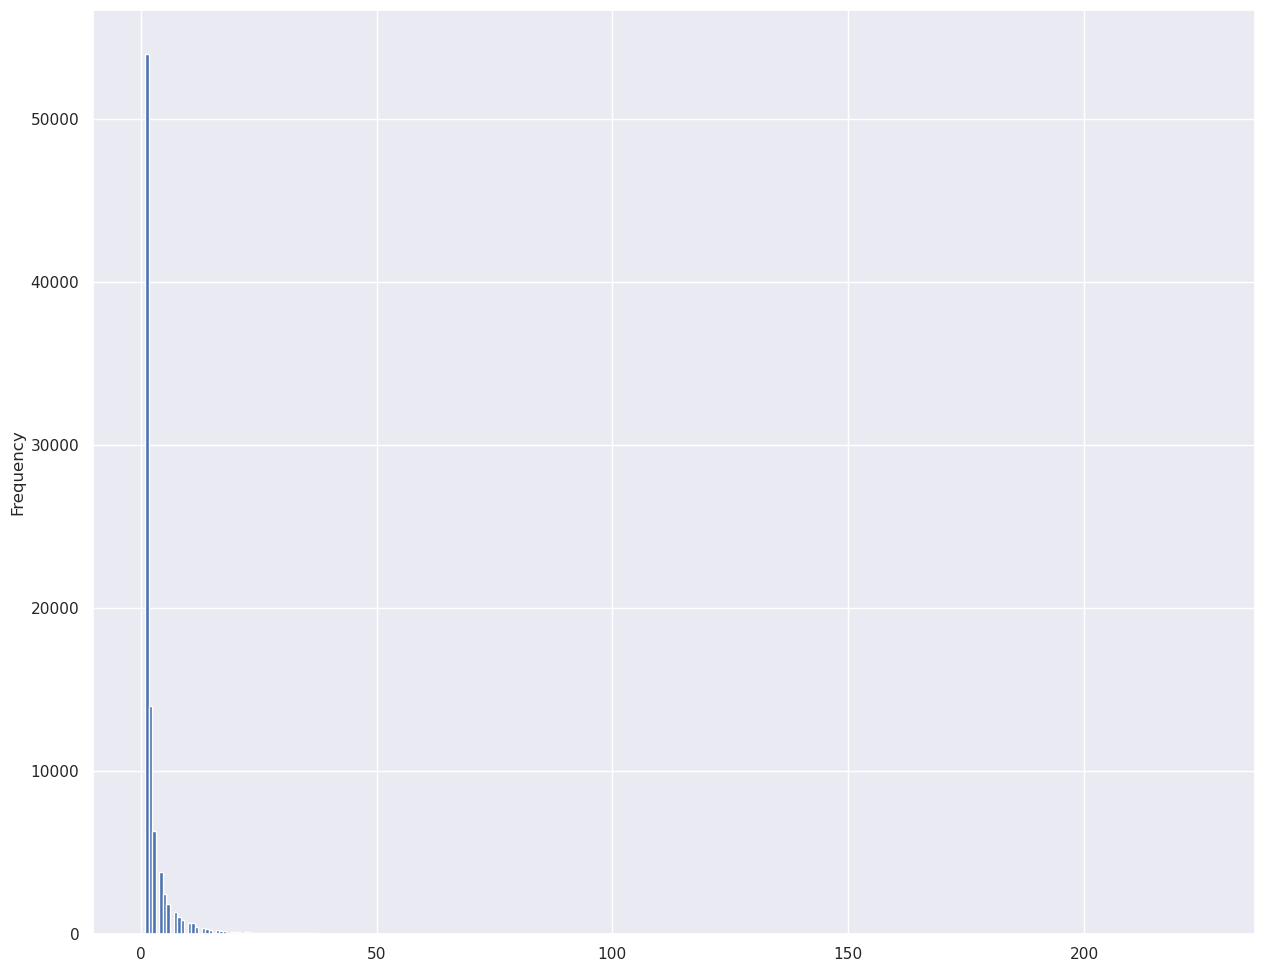

In [72]:
from math import log
print(cluster_tsv.drop_duplicates().groupby("Rep").apply(len).max())

print(cluster_tsv.drop_duplicates().groupby("Rep").apply(len).value_counts().sort_index())
cluster_tsv.drop_duplicates().groupby("Rep").apply(len).plot.hist(bins=300)

## Trying NLP Encodings:

hdf needs pytables depencency

In [ ]:
import pandas as pd

df_secvec = pd.read_hdf("/home/ad/seqvec_test/uniref50_v2/weights.hdf5")


ValueError: Dataset(s) incompatible with Pandas data types, not table, or no datasets found in HDF5 file.

In [ ]:
# Requires python 3.6
"""
mamba create -n biovec python=3.6 ipython
pip3 install biovec

ipython
import biovec
pv = biovec.models.ProtVec("swissprot.fasta", corpus_fname="output_corpusfile_path.txt", workers=80)
"""

import biovec

pv = biovec.models.ProtVec("some_fasta_file.fasta", corpus_fname="output_corpusfile_path.txt")

# The n-gram "QAT" should be trained in advance
pv["QAT"]

# convert whole amino acid sequence into vector
pv.to_vecs("ATATQSQSMTEEL")

# save trained model into file
pv.save('model_file_path')

# load trained model from file
pv2 = biovec.models.load_protvec('model_file_path')


ModuleNotFoundError: No module named 'fasta'

In [ ]:
from allennlp.commands.elmo import ElmoEmbedder
from pathlib import Path

model_dir = Path("/home/ad/seqvec_test/uniref50_v2")
weights = model_dir / "weights.hdf5"
options = model_dir / "options.json"
embedder = ElmoEmbedder(options, weights, cuda_device=0)  # cuda_device=-1 for CPU

seq = "SEQWENCE"  # your amino acid sequence
embedding = embedder.embed_sentence(list(seq))  # List-of-Lists with shape [3,L,1024]


seq1 = "SEQWENCE"  # your amino acid sequence
seq2 = "PROTEIN"
seqs = [list(seq1), list(seq2)]
seqs.sort(key=len)  # sorting is crucial for speed
embedding = embedder.embed_sentences(
    seqs
)  # returns: List-of-Lists with shape [3,L,1024]


import torch

residue_embd = torch.tensor(embedding).sum(dim=0)  # Tensor with shape [L,1024]
protein_embd = (
    torch.tensor(embedding).sum(dim=0).mean(dim=0)
)  # Vector with shape [1024]


ValueError: greenlet.greenlet size changed, may indicate binary incompatibility. Expected 144 from C header, got 40 from PyObject